# Optimization of the XGBoost algorithm

In [263]:
run init.ipynb

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
Done.


In [280]:
df =  pd.read_csv(AUTISM_DATA_PATH)

data = Dataset(df=df, 
               missing_data_handling='imputation',
               imputation_method='constant',
               sampling_method='without',
               scenario = None,#'multimodal_2023', 
               features_name = deepcopy(DEFAULT_PREDICTORS_BY_TYPES['All']),
               scale_data=False, 
               use_missing_indicator_variables=USE_MISSING_INDICATOR_PREDICTORS,
               verbosity=1, 
               proportion_train=1)


data.filter(administration={'studies':  ['ARC', 'P1', 'P2'],
                                        'order': 'first',
                                        'completed': True}, 
                           demographics={'age':[17, 41]},
                            clinical={'diagnosis': [0, 1, 2]},
                            verbose=True)

display(data.df.groupby('study')[['id']].count())

477 administrations left.


,id
diagnosis,
0.0,328
1.0,51
2.0,98


,id
study,
ARC,48
P1,426
P2,3


,experiment_name,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,F2,F2 Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Corrected Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV),TP,TN,FP,FN
0,FINAL,0.872,0.651,0.942,0.343,0.989,0.683,0.136,0.683,0.274,0.789,0.471,0.839,0.78,0.392,0.082,0.966,0.161,0.608,0.034,47,259,73,9


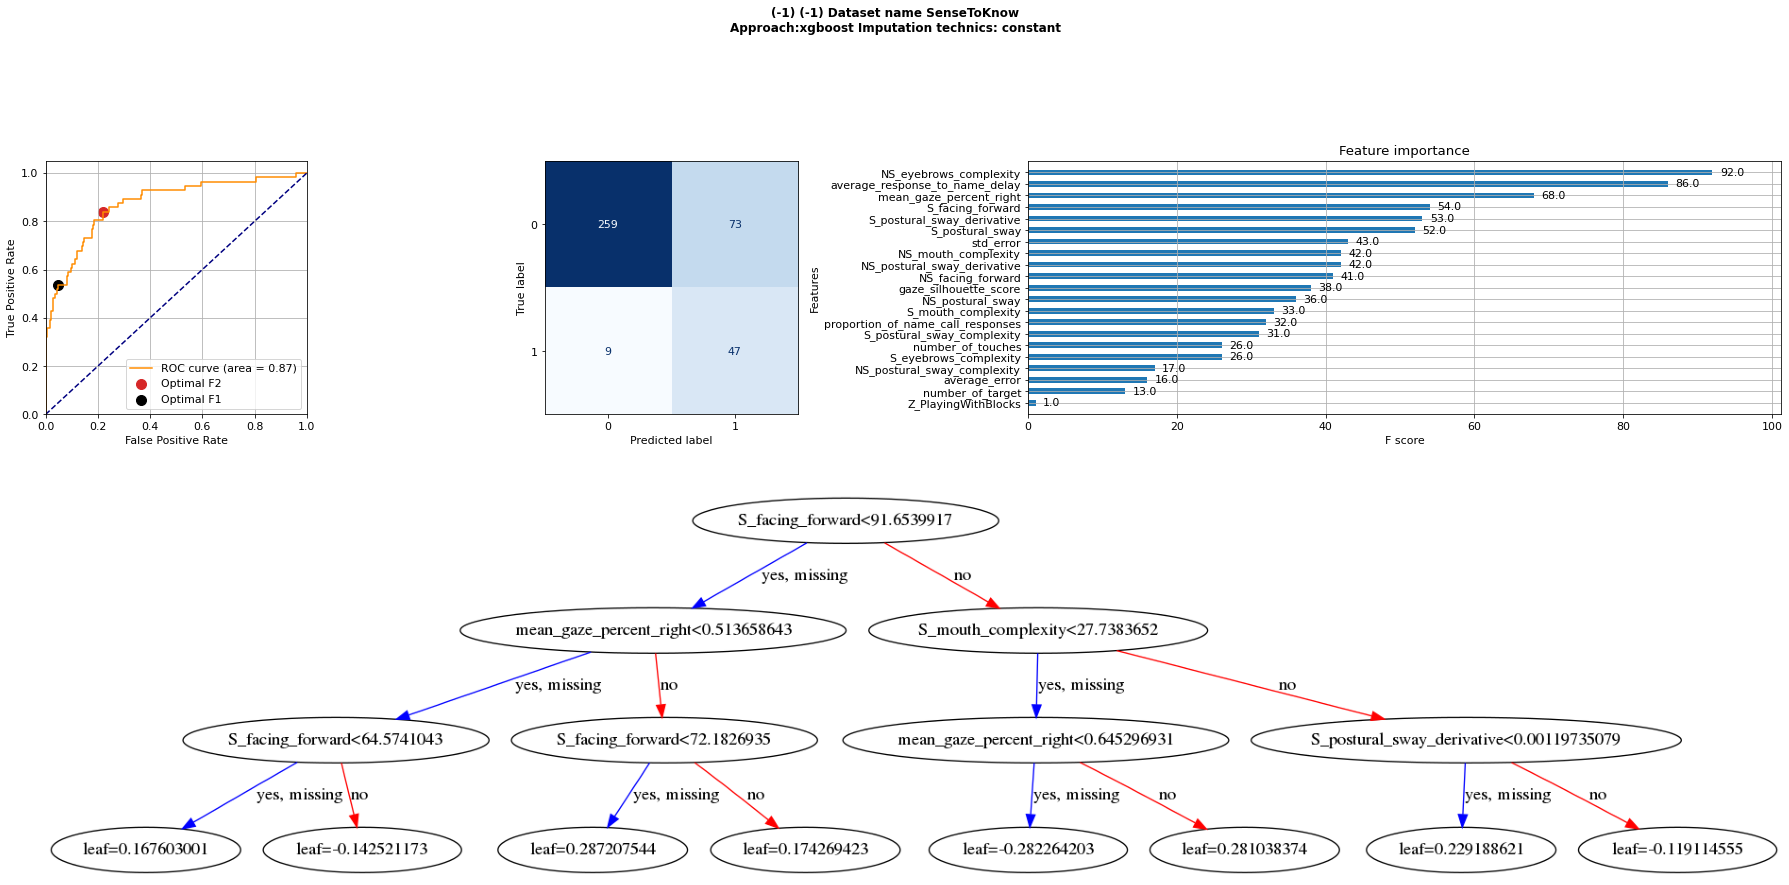

In [261]:
exp = Experiments(data.dataset_name,
                  dataset=data, 
                  approach='xgboost', 
                  previous_experiment=None,        
                  debug=False, 
                  experiment_folder_name='PAPER', 
                  model_hyperparameters=xgboost_hyperparameters,
                  experiment_name = 'FINAL',
                  verbosity=1, 
                  save_experiment=False)

exp.fit_predict(num_cv='loocv')
exp.plot()

In [194]:
df =  pd.read_csv(AUTISM_DATA_PATH)

data = Dataset(df=df, 
               missing_data_handling='imputation',
               imputation_method='constant',
               sampling_method='without',
               scenario = 'multimodal_2023', 
               features_name = deepcopy(DEFAULT_PREDICTORS_BY_TYPES['All']),
               scale_data=False, 
               use_missing_indicator_variables=USE_MISSING_INDICATOR_PREDICTORS,
               verbosity=1, 
               proportion_train=1)



exp = Experiments(data.dataset_name,
                  dataset=data, 
                  approach='xgboost', 
                  previous_experiment=1,        
                  debug=False, 
                  experiment_folder_name='PAPER', 
                  model_hyperparameters=xgboost_hyperparameters,
                  experiment_name = 'FINAL',
                  verbosity=1, 
                  save_experiment=False)

Subjects diagnosed with ASD as per our data but not ASD as per the EHR: 9
Subjects with TD diagnosis actually having ASD: 2
Subjects with Unknown diagnosis actually having ASD: 10
Subjects with ADHD diagnosis actually having ASD: 1
Subjects with DDLD diagnosis actually having ASD: 3
Subjects with Unknown diagnosis actually having DDLD: 30


,ASD,DDLD,ADHD
ASD,38.0,44.0,6.0
DDLD,3.0,14.0,1.0
TD,2.0,91.0,3.0
Other,2.0,7.0,1.0
ADHD,1.0,1.0,0.0
NaN,8.0,23.0,0.0


389 administrations left.


,id
diagnosis,
0.0,333
1.0,56


Experiment 1 loaded successfully! :-)


467 administrations left.


,id
diagnosis,
0.0,417
1.0,50


Saving experiment in folder PAPER.
Doing experiment 1!


,experiment_name,AUROC,AUC-PR,AUC-PR-Gain,AUC-PR-Corrected,AUC-PR-Gain-Corrected,F1 score (2 PPVxTPR/(PPV+TPR)),F1 score Corrected,F2,F2 Corrected,Accuracy,Matthews correlation coefficient (MCC),"Sensitivity, recall, hit rate, or true positive rate (TPR)","Specificity, selectivity or true negative rate (TNR)",Precision or positive predictive value (PPV),Corrected Precision or positive predictive value (PPV),Negative predictive value (NPV),Miss rate or false negative rate (FNR),False discovery rate (FDR=1-PPV),False omission rate (FOR=1-NPV),TP,TN,FP,FN
0,FINAL,0.871,0.541,0.92,0.26,0.984,0.649,0.159,0.649,0.307,0.833,0.467,0.8,0.837,0.37,0.102,0.972,0.2,0.63,0.028,40,349,68,10


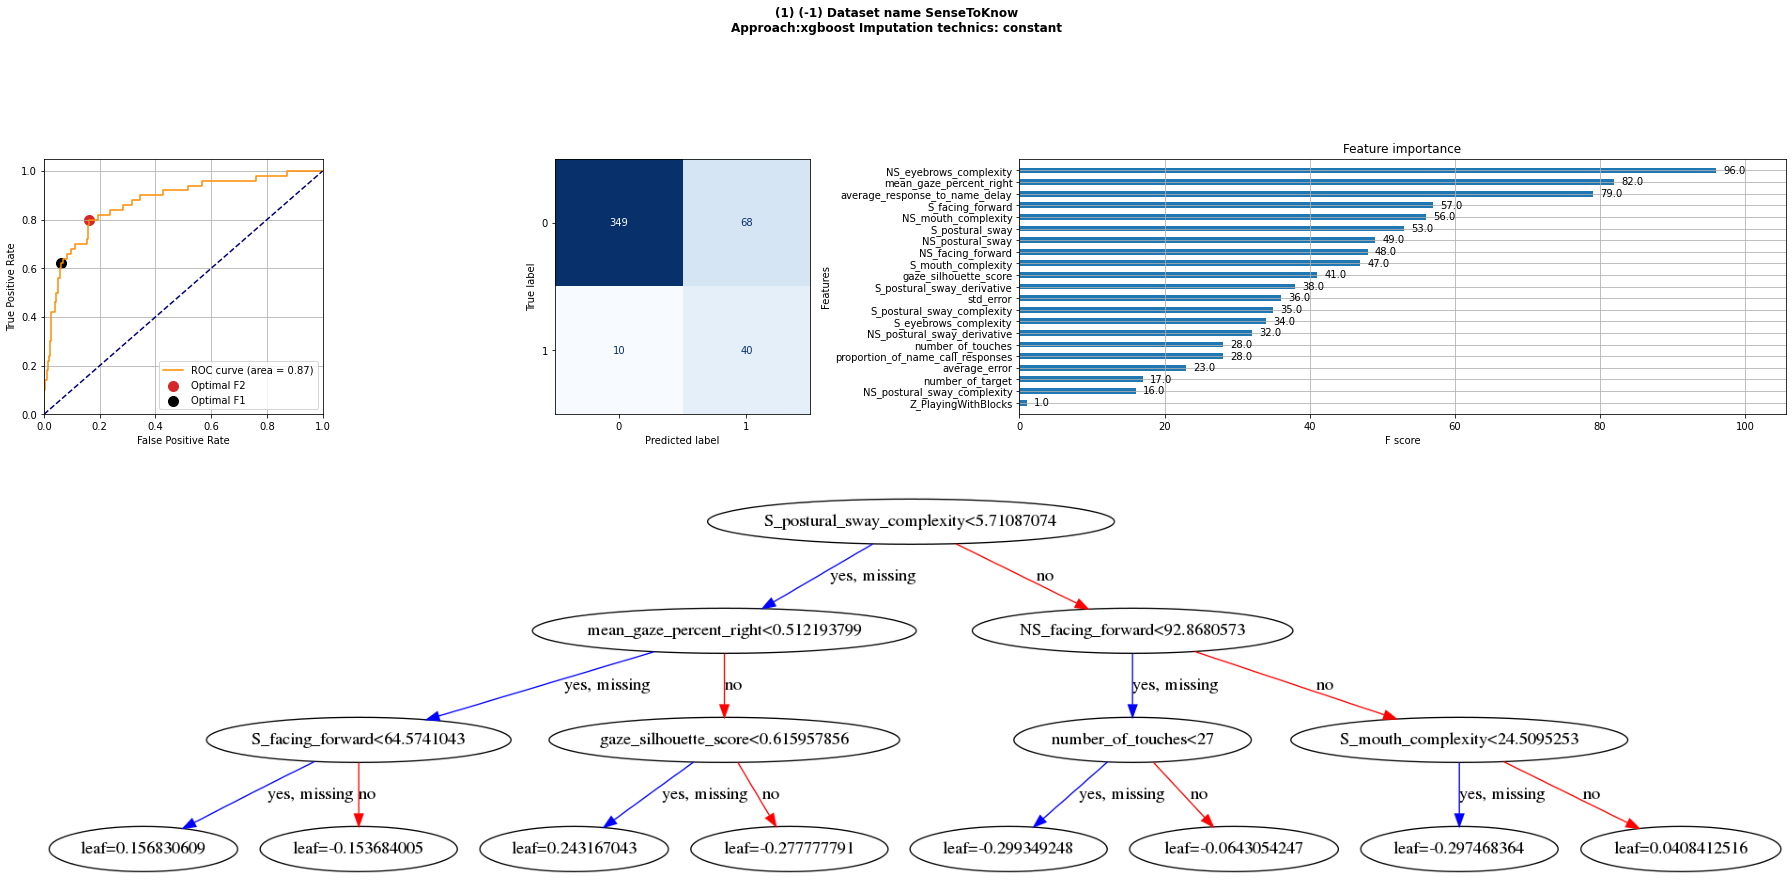

In [2]:
xgboost_hyperparameters = {'scale_pos_weight':True,#np.sum(data.y_train==0)/np.sum(data.y_train==1), 
                            'max_depth' : 3,
                            'learning_rate' : 0.15, 
                            'gamma': 0.1,
                            'n_estimators': 200,
                            'min_child_weight': 1,
                            'reg_lambda': 0.1}
    
use_weight = True
if use_weight:
    weighted_confidence_score = np.load(os.path.join(DATA_DIR, 'weight_multimodal.npy'))
else:
    weighted_confidence_score = None
    
    
df =  pd.read_csv(AUTISM_DATA_PATH)

data = Dataset(df=df, 
               missing_data_handling='imputation',
               imputation_method='constant',
               sampling_method='without',
               scenario = 'multimodal_2023', 
               features_name = deepcopy(DEFAULT_PREDICTORS_BY_TYPES['All']),
               scale_data=False, 
               use_missing_indicator_variables=USE_MISSING_INDICATOR_PREDICTORS,
               verbosity=1, 
               proportion_train=1)

exp = Experiments(data.dataset_name,
                  dataset=data, 
                  approach='xgboost', 
                  previous_experiment=1,        
                  debug=False, 
                  experiment_folder_name='PAPER', 
                  model_hyperparameters=xgboost_hyperparameters,
                  experiment_name = 'FINAL',
                  verbosity=1, 
                  save_experiment=False)

#exp.fit_predict(num_cv='loocv', sample_weight=weighted_confidence_score)
exp.predictions_df['sample_weight'] = weighted_confidence_score
exp.plot()



# Cohort description 

In [7]:
xgboost_hyperparameters = {'scale_pos_weight':True,#np.sum(data.y_train==0)/np.sum(data.y_train==1), 
                            'max_depth' : 3,
                            'learning_rate' : 0.15, 
                            'gamma': 0.1,
                            'n_estimators': 200,
                            'min_child_weight': 1,
                            'reg_lambda': 0.1}
    
use_weight = True
if use_weight:
    weighted_confidence_score = np.load(os.path.join(DATA_DIR, 'weight_multimodal.npy'))
else:
    weighted_confidence_score = None
    
    
df =  pd.read_csv(AUTISM_DATA_PATH)

data = Dataset(df=df, 
               missing_data_handling='imputation',
               imputation_method='constant',
               sampling_method='without',
               scenario = 'multimodal_2023', 
               features_name = deepcopy(DEFAULT_PREDICTORS_BY_TYPES['All']),
               scale_data=False, 
               use_missing_indicator_variables=USE_MISSING_INDICATOR_PREDICTORS,
               verbosity=1, 
               proportion_train=1)

data.df = data.df.replace({'primary_education': {0: 'Unknown',
                                       1: 'Without High School Diploma',
                                       2: 'Without High School Diploma',
                                       9: 'Without High School Diploma',
                                       3: 'High School Diploma or Equivalent',
                                       4: 'Some College Education',
                                       5: '4-Year College Degree or More',
                                       6: '4-Year College Degree or More',
                                       7: '4-Year College Degree or More',
                                       8: '4-Year College Degree or More'}})


display(data.df.groupby('study')[['id']].count())

467 administrations left.


,id
diagnosis,
0.0,417
1.0,50


In [8]:
data.df[DEMOGRAPHIC_COLUMNS]

,age,sex,ethnicity,race,primary_education
0,24.262295,F,Not Hispanic/Latino,White/Caucasian,4-Year College Degree or More
1,30.754098,M,Not Hispanic/Latino,White/Caucasian,4-Year College Degree or More
2,25.245902,M,Not Hispanic/Latino,White/Caucasian,4-Year College Degree or More
3,48.688525,M,Not Hispanic/Latino,White/Caucasian,4-Year College Degree or More
4,29.901639,M,Not Hispanic/Latino,Black/African American,4-Year College Degree or More
...,...,...,...,...,...
462,48.327869,M,Not Hispanic/Latino,More than one race,Some College Education
463,40.262295,M,Not Hispanic/Latino,White/Caucasian,Some College Education
464,47.081967,M,Not Hispanic/Latino,More than one race,High School Diploma or Equivalent
465,49.311475,M,Not Hispanic/Latino,Other,4-Year College Degree or More


In [ ]:
################ IQ ###############
u, p = mannwhitneyu(x=results_old.query("`comorbidity`=='ADHD/ASD'").das_general_conceptual_ability.dropna(), 
                    y=results_old.query("`comorbidity`=='ASD'").das_general_conceptual_ability.dropna(), 
                    alternative='two-sided')

In [17]:
def print_group_distribution(df, attribute, name, attribute_type):   
    df = df.replace({'primary_education': {0: 'Unknown',
                                       1: 'Without High School Diploma',
                                       2: 'Without High School Diploma',
                                       9: 'Without High School Diploma',
                                       3: 'High School Diploma or Equivalent',
                                       4: 'Some College Education',
                                       5: '4-Year College Degree or More',
                                       6: '4-Year College Degree or More',
                                       7: '4-Year College Degree or More',
                                       8: '4-Year College Degree or More'}})
    
    df = df.replace({'race': {0: 'White',
                                       1: 'Black/African American',
                                       2: 'More than one race',
                                       1: 'Without',
                                       1: 'Without',
                                       1: 'Without',
                                       9: 'Without High School Diploma',
                                       3: 'High School Diploma or Equivalent',
                                       4: 'Some College Education',
                                       5: '4-Year College Degree or More',
                                       6: '4-Year College Degree or More',
                                       7: '4-Year College Degree or More',
                                       8: '4-Year College Degree or More'}})
    
    print("\n#### {} ####".format(name))

    if attribute_type.lower() == 'numerical':
        df_mean = df[attribute].mean()
        df_std = df[attribute].std()
        df_missing =  df[attribute].isna().sum()



        print(df_mean, df_std, df_missing)

    elif attribute_type.lower() == 'categorical':
        df_freq = df[attribute].value_counts(dropna=False).rename('frequency')
        df_perc = df[attribute].value_counts(normalize=True, dropna=False).rename('percentage') * 100
        df_missing =  df[attribute].isna().sum()
        print(pd.concat([df_freq, df_perc], axis=1), df_missing)

    else:
        print('Warning, attribute type not recognized.')

attributes_list = ['age',  'sex', 'race', 'ethnicity', 'primary_education', 'mchat_result', 
                   'ados_total' , 'ados_rrb' , 'ados_sa' , 'mullen_elc_std', 'mullen_el',
                   'mullen_rl', 'mullen_fm', 'mullen_vr']
attributes_names = ['Age','Sex', 'Race', 'Ethnicity', 'Primary Education', 'MCHAT R/F',
                    'ADOS-2 Calibrated Severity Score','ADOS-2 RRB', 'ADOS-2 SA',  'Mullen Scales of Early Learning', 'Expressive Language T-Score',
                    'Receptive Language T-Score', 'Fine Motor T-Score', 'Visual Reception T-Score']
attributes_type = ['Numerical', 'Categorical', 'Categorical', 'Categorical', 'Categorical', 'Categorical',
                   'Numerical', 'Numerical', 'Numerical', 'Numerical', 'Numerical','Numerical', 'Numerical', 'Numerical', 'Categorical','Numerical', 'Numerical', 'Numerical',
                  'Numerical', 'Numerical', 'Numerical', 'Numerical', 'Numerical']

#df = results_young[results_young['diagnosis']!='DDLD']
#df = df_results[df_results['diagnosis']!='DDLD']
df = data.df


for diagnosis in [0, 1]:
    print("\n\n\n\nDIAGNOSIS: {}".format(diagnosis))
    for att, att_name, att_type in zip(attributes_list, attributes_names, attributes_type):
        print_group_distribution(df[df['diagnosis']==diagnosis], att, att_name, att_type)






DIAGNOSIS: 0

#### Age ####
20.781145575343004 4.042809589721368 0

#### Sex ####
   frequency  percentage
M        212   50.839329
F        205   49.160671 0

#### Race ####
                                frequency  percentage
White/Caucasian                       318   76.258993
Black/African American                 43   10.311751
More than one race                     40    9.592326
Other                                   9    2.158273
Asian                                   6    1.438849
American Indian/Alaskan Native          1    0.239808 0

#### Ethnicity ####
                     frequency  percentage
Not Hispanic/Latino        386   92.565947
Hispanic/Latino             31    7.434053 0

#### Primary Education ####
                                   frequency  percentage
4-Year College Degree or More            357   85.611511
Some College Education                    41    9.832134
High School Diploma or Equivalent         15    3.597122
Without High School Diploma     

# Correlations between features 

In [20]:
import missingno as msno
df_X = exp.dataset.df[['age'] + data.features_name[:-4]]


def custom_spearmanr(x, y):
    from scipy.stats import spearmanr
    return spearmanr(x, y, nan_policy='omit').correlation

def custom_spearmanr_pvalue(x, y):
    from scipy.stats import spearmanr
    return spearmanr(x, y, nan_policy='omit').pvalue

# Computes feature correlation
df_corr = df_X.corr(method=custom_spearmanr)
df_p = df_X.corr(method=custom_spearmanr_pvalue)

labels = np.where(np.abs(df_corr)>0.75, "S",
                  np.where(np.abs(df_corr)>0.5, "M",
                           np.where(np.abs(df_corr)>0.3, "W", "")))

labels_p = np.where(df_p>0.05, "",
                  np.where(df_p>0.01, "*",
                           np.where(df_p>0.001, "**", 
                                    np.where(df_p>0.0000000000000000000000001, "***",""))))





In [33]:
label_final = np.zeros_like(labels_p)
for i in range(label_final.shape[0]):
    for j in range(label_final.shape[0]):
        label_final[i,j] = labels[i, j] + ' ' + labels_p[i, j]

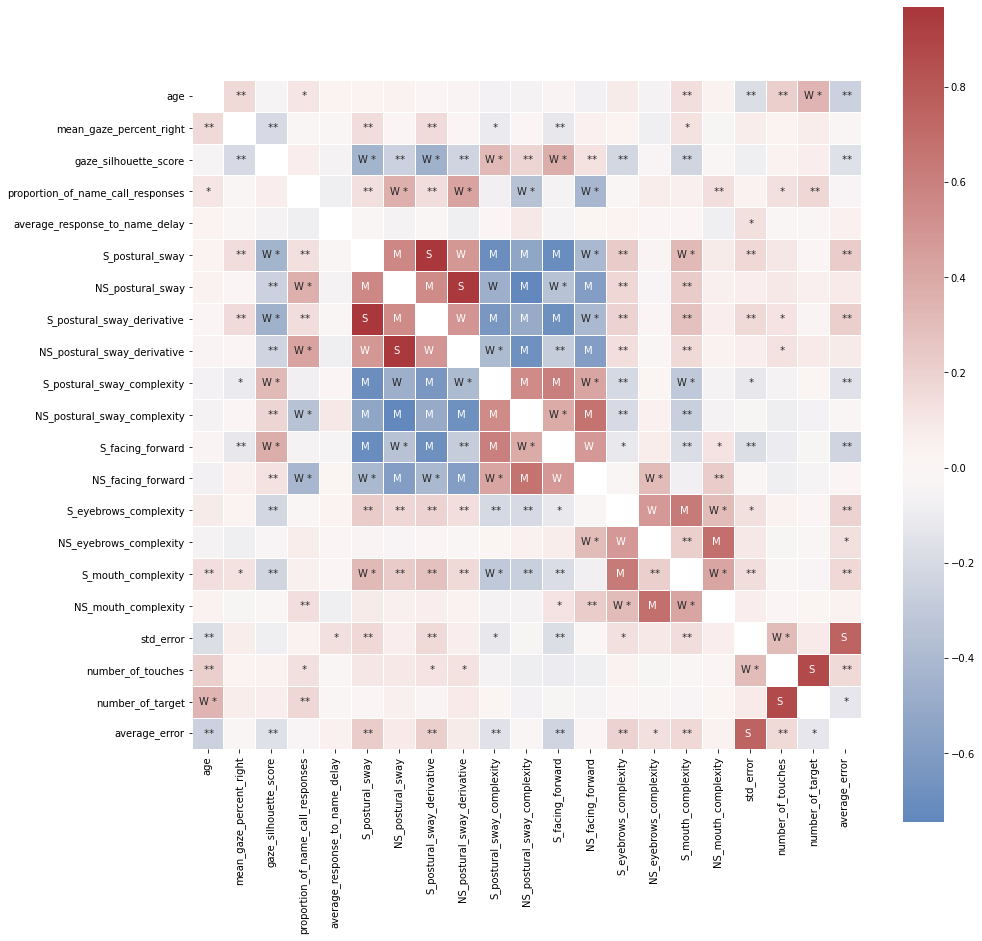

In [35]:
# Plot correlation matrix
plt.figure(figsize=(15, 15))
sns.heatmap(df_corr, mask=np.eye(len(df_corr)), square=True,
            center=0, annot=label_final, fmt='', linewidths=.5,
            cmap="vlag", cbar_kws={"shrink": 0.8});

<AxesSubplot:title={'center':'Percentage of missing values per feature'}>

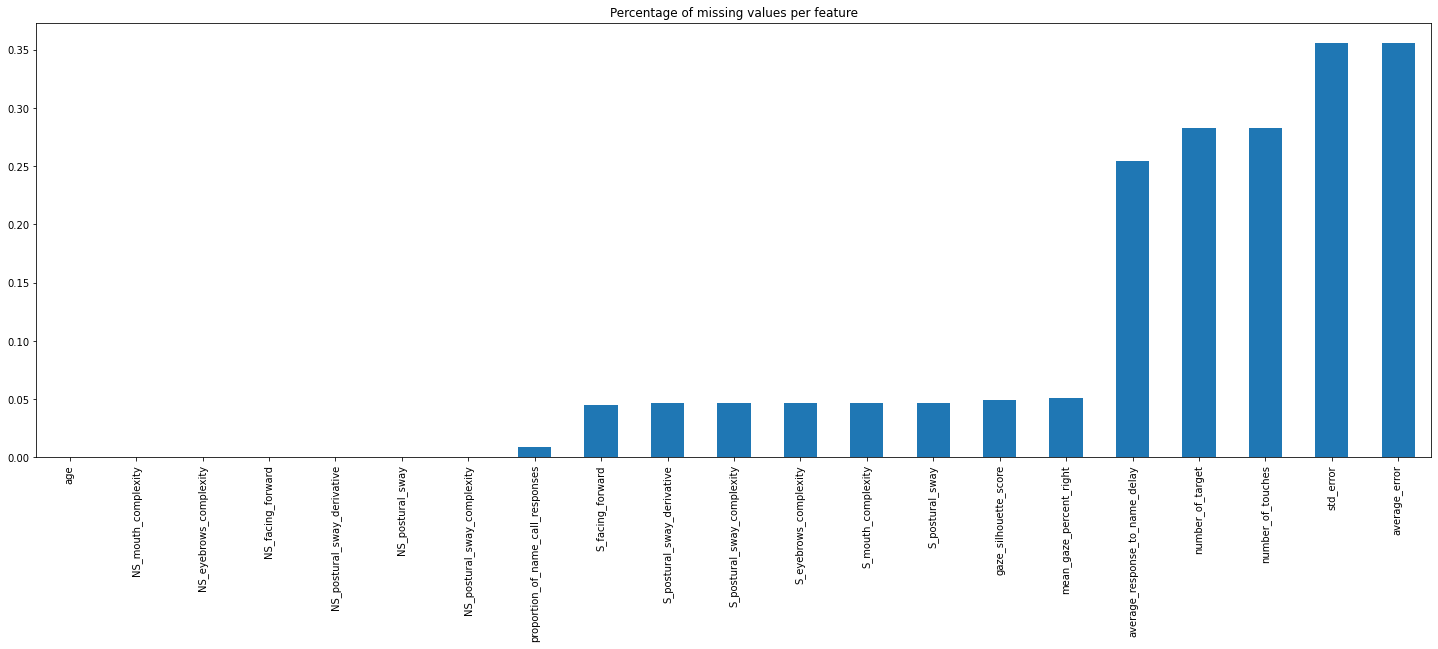

In [40]:
plt.figure()
df_X.isna().mean().sort_values().plot(
    kind="bar", figsize=(25, 8),
    title="Percentage of missing values per feature")

In [41]:
df_X.isna().mean()

age                                  0.000000
mean_gaze_percent_right              0.051392
gaze_silhouette_score                0.049251
proportion_of_name_call_responses    0.008565
average_response_to_name_delay       0.254818
S_postural_sway                      0.047109
NS_postural_sway                     0.000000
S_postural_sway_derivative           0.047109
NS_postural_sway_derivative          0.000000
S_postural_sway_complexity           0.047109
NS_postural_sway_complexity          0.000000
S_facing_forward                     0.044968
NS_facing_forward                    0.000000
S_eyebrows_complexity                0.047109
NS_eyebrows_complexity               0.000000
S_mouth_complexity                   0.047109
NS_mouth_complexity                  0.000000
std_error                            0.355460
number_of_touches                    0.282655
number_of_target                     0.282655
average_error                        0.355460
dtype: float64

# EHR Data verification of the diagnosis


In [195]:
df =  pd.read_csv(AUTISM_DATA_PATH)
df[df.diagnosis.isna()]

,id,diagnosis,language,app_version,subject,administration,features_extracted,face_tracking,age,timestamp,date,time,study,stimuli_version,sex,ethnicity,race,primary_education,asd_yn,mullen_el,mullen_fm,mullen_rl,mullen_vr,mullen_elc_std,ados_total,ados_rrb,ados_sa,srs_total_tscore,srs_social_awareness_tscore,srs_social_motivation_tscore,cbcl_scaleIV_score,cbcl_asd_score,mchat_total,mchat_final,mchat_result,BB_gaze_percent_right,BB_gaze_silhouette_score,S_gaze_percent_right,S_gaze_silhouette_score,FP_gaze_speech_correlation,FP_gaze_silhouette_score,proportion_of_name_call_responses,average_response_to_name_delay,valid_name_calls,FB_postural_sway,FB_postural_sway_derivative,DIGC_postural_sway,DIGC_postural_sway_derivative,DIGRRL_postural_sway,DIGRRL_postural_sway_derivative,ST_postural_sway,ST_postural_sway_derivative,MP_postural_sway,MP_postural_sway_derivative,PB_postural_sway,PB_postural_sway_derivative,BB_postural_sway,BB_postural_sway_derivative,RT_postural_sway,RT_postural_sway_derivative,MML_postural_sway,MML_postural_sway_derivative,PWB_postural_sway,PWB_postural_sway_derivative,FP_postural_sway,FP_postural_sway_derivative,number_of_touches,average_length,std_length,average_error,std_error,number_of_target,pop_rate,average_touch_duration,std_touch_duration,average_delay_to_pop,std_delay_to_pop,repeat_percentage,repeat_percentage_naive,double_tap,mean_velocity,std_velocity,average_force_applied,std_force_applied,average_accuracy_variation,accuracy_consistency,average_touches_per_target,std_touches_per_target,average_time_spent,std_time_spent,exploratory_percentage,validity_available,completed,StateOfTheChild,SiblingsInTheRoom,ShotsVaccines,Distractions,FamilyMemberDistract,PetDistract,PetNoiseDistract,DoorbellPhoneDistract,TVOnDistract,OtherDistract,SittingUp,Hungry,Diaper,AppTeamComment,Comments,path,FB_head_movement_complexity,DIGC_head_movement_complexity,DIGRRL_head_movement_complexity,ST_head_movement_complexity,MP_head_movement_complexity,PB_head_movement_complexity,BB_head_movement_complexity,RT_head_movement_complexity,MML_head_movement_complexity,PWB_head_movement_complexity,FP_head_movement_complexity,FB_facing_forward,DIGC_facing_forward,DIGRRL_facing_forward,ST_facing_forward,MP_facing_forward,PB_facing_forward,BB_facing_forward,RT_facing_forward,MML_facing_forward,PWB_facing_forward,FP_facing_forward,FB_eyebrows_complexity,DIGC_eyebrows_complexity,DIGRRL_eyebrows_complexity,ST_eyebrows_complexity,MP_eyebrows_complexity,PB_eyebrows_complexity,BB_eyebrows_complexity,RT_eyebrows_complexity,MML_eyebrows_complexity,PWB_eyebrows_complexity,FP_eyebrows_complexity,FB_mouth_complexity,DIGC_mouth_complexity,DIGRRL_mouth_complexity,ST_mouth_complexity,MP_mouth_complexity,PB_mouth_complexity,BB_mouth_complexity,RT_mouth_complexity,MML_mouth_complexity,PWB_mouth_complexity,FP_mouth_complexity
798,IMP001,NaN,English,2.0,<Subject.S2KSubject object at 0x7fea9191c3d0>,<Administration.S2KAdministration object at 0x...,1,1,NaN,Baseline,2019-11-04,NaN,IMPACT,Preschool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.372021,0.494525,0.267790,0.510585,0.367273,0.561994,1.000000,1.512622,"[1, 1, 1]",1.582021,0.020940,1.578227,0.008215,4.921483,0.026502,1.371391,0.009215,1.079642,0.004036,NaN,NaN,1.973891,0.011711,5.154798,0.022791,7.588681,0.026074,2.766019,0.013521,4.123896,0.018412,41.0,2.487457,3.275710,8.578470,4.774662,34.0,0.951220,0.036439,0.039872,1.592656,0.274305,0.057143,0.878049,0.147059,0.036439,0.039872,0.193780,0.238740,0.005114,0.138189,1.205882,0.404345,0.422429,0.118088,66.666667,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/diskD/AutismCenter/Data/SenseToKnow/Processed...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
799,IMP002,NaN,English,2.0,<Subject.S2KSubject object at 0x7fea9191c410>,<Administration.S2KAdministration object 

In [185]:
df['diagnosis'].unique()

array(['ASD', 'DDLD', 'TD', 'Other', 'ADHD', nan], dtype=object)

In [250]:
df =  pd.read_csv(AUTISM_DATA_PATH)


# Load EHR data and reformat
ehr_data = pd.read_csv("/home01/sam/notes_on_stats/data/P1_EHR_FINAL.csv")
ehr_data.rename(columns={'ace_id':'id'}, inplace=True)
ehr_data['id'] = ehr_data['id'].astype(str)

# First we select the app data that are included in the EHR dataset
df_merge = pd.merge(df, ehr_data, how='left', on='id')

# Remove duplicates since in the app dataset a subjects may have several rows for several administrations
if True:
    df_merge.drop_duplicates(subset='id', inplace=True)
    

# Sanity check: Does all the ASD have a asd_dx to 1 ? 
print("Subjects diagnosed with ASD as per our data but not ASD as per the EHR: {}".format(len(select(select(df_merge, 'diagnosis', 'ASD'), 'asd_dx', 0))))

# Subjects with TD diagnosis actually having ASD:
print("Subjects with TD diagnosis actually having ASD: {}".format(len(select(select(df_merge, 'diagnosis', 'TD'), 'asd_dx', 1))))

# Subjects with Unknown diagnosis actually having ASD:
print("Subjects with Unknown diagnosis actually having ASD: {}".format(len(select(df_merge[(df_merge['diagnosis'] == 'Other') | (df_merge['diagnosis'].isnull())], 'asd_dx', 1))))

# Subjects with ADHD actually having ASD:
print("Subjects with ADHD diagnosis actually having ASD: {}".format(len(select(select(df_merge, 'diagnosis', 'ADHD'), 'asd_dx', 1))))

# Subjects with DDLD actually having ASD:
print("Subjects with DDLD diagnosis actually having ASD: {}".format(len(select(select(df_merge, 'diagnosis', 'DDLD'), 'asd_dx', 1))))

# Subjects with Unknown diagnosis actually having DDLD:
print("Subjects with Unknown diagnosis actually having DDLD: {}".format(len(select(df_merge[(df_merge['diagnosis'] == 'Other') | (df_merge['diagnosis'].isnull())], 'ddld_dx', 1))))

# Set the unknown diagnosis or TD having ASD as ASD
df_merge.loc[((df_merge['diagnosis'] == 'Other') | (df_merge['diagnosis'].isnull()) | (df_merge['diagnosis'] == 'TD')) &  df_merge['asd_dx'] == 1, 'diagnosis'] = 'ASD'

# Set the unknown diagnosis or TD having DDLD as DDLD
df_merge.loc[((df_merge['diagnosis'] == 'Other') | (df_merge['diagnosis'].isnull()) | (df_merge['diagnosis'] == 'TD')) &  df_merge['ddld_dx'] == 1, 'diagnosis'] = 'DDLD'

# Set the unknown diagnosis or TD having ADHD as ADHD
df_merge.loc[((df_merge['diagnosis'] == 'Other') | (df_merge['diagnosis'].isnull()) | (df_merge['diagnosis'] == 'TD')) &  df_merge['adhd_dx'] == 1, 'diagnosis'] = 'ADHD'


# Set the DDLD with ASD as ASD
df_merge.loc[((df_merge['diagnosis'] == 'DDLD')) &  df_merge['asd_dx'] == 1, 'diagnosis'] = 'ASD'

# Set the TD diagnosis having DDLD as DDLD
df_merge.loc[((df_merge['diagnosis'] == 'TD')) &  df_merge['ddld_dx'] == 1, 'diagnosis'] = 'DDLD'

# Set the TD diagnosis having ADHD as ADHD
df_merge.loc[((df_merge['diagnosis'] == 'ADHD')) &  df_merge['adhd_dx'] == 1, 'diagnosis'] = 'ADHD'




Subjects diagnosed with ASD as per our data but not ASD as per the EHR: 9
Subjects with TD diagnosis actually having ASD: 2
Subjects with Unknown diagnosis actually having ASD: 10
Subjects with ADHD diagnosis actually having ASD: 1
Subjects with DDLD diagnosis actually having ASD: 3
Subjects with Unknown diagnosis actually having DDLD: 21


In [248]:
df_merge[((df_merge['diagnosis'].isna()) | 
         (df_merge['diagnosis'] == 'Other')) & 
        
        (df_merge['age'] >=17) 
        ]

,id,diagnosis,language,app_version,subject,administration,features_extracted,face_tracking,age,timestamp,date,time,study,stimuli_version,sex_x,ethnicity,race,primary_education,asd_yn,mullen_el,mullen_fm,mullen_rl,mullen_vr,mullen_elc_std,ados_total,ados_rrb,ados_sa,srs_total_tscore,srs_social_awareness_tscore,srs_social_motivation_tscore,cbcl_scaleIV_score,cbcl_asd_score,mchat_total,mchat_final,mchat_result,BB_gaze_percent_right,BB_gaze_silhouette_score,S_gaze_percent_right,S_gaze_silhouette_score,FP_gaze_speech_correlation,FP_gaze_silhouette_score,proportion_of_name_call_responses,average_response_to_name_delay,valid_name_calls,FB_postural_sway,FB_postural_sway_derivative,DIGC_postural_sway,DIGC_postural_sway_derivative,DIGRRL_postural_sway,DIGRRL_postural_sway_derivative,ST_postural_sway,ST_postural_sway_derivative,MP_postural_sway,MP_postural_sway_derivative,PB_postural_sway,PB_postural_sway_derivative,BB_postural_sway,BB_postural_sway_derivative,RT_postural_sway,RT_postural_sway_derivative,MML_postural_sway,MML_postural_sway_derivative,PWB_postural_sway,PWB_postural_sway_derivative,FP_postural_sway,FP_postural_sway_derivative,number_of_touches,average_length,std_length,average_error,std_error,number_of_target,pop_rate,average_touch_duration,std_touch_duration,average_delay_to_pop,std_delay_to_pop,repeat_percentage,repeat_percentage_naive,double_tap,mean_velocity,std_velocity,average_force_applied,std_force_applied,average_accuracy_variation,accuracy_consistency,average_touches_per_target,std_touches_per_target,average_time_spent,std_time_spent,exploratory_percentage,validity_available,completed,StateOfTheChild,SiblingsInTheRoom,ShotsVaccines,Distractions,FamilyMemberDistract,PetDistract,PetNoiseDistract,DoorbellPhoneDistract,TVOnDistract,OtherDistract,SittingUp,Hungry,Diaper,AppTeamComment,Comments,path,FB_head_movement_complexity,DIGC_head_movement_complexity,DIGRRL_head_movement_complexity,ST_head_movement_complexity,MP_head_movement_complexity,PB_head_movement_complexity,BB_head_movement_complexity,RT_head_movement_complexity,MML_head_movement_complexity,PWB_head_movement_complexity,FP_head_movement_complexity,FB_facing_forward,DIGC_facing_forward,DIGRRL_facing_forward,ST_facing_forward,MP_facing_forward,PB_facing_forward,BB_facing_forward,RT_facing_forward,MML_facing_forward,PWB_facing_forward,FP_facing_forward,FB_eyebrows_complexity,DIGC_eyebrows_complexity,DIGRRL_eyebrows_complexity,ST_eyebrows_complexity,MP_eyebrows_complexity,PB_eyebrows_complexity,BB_eyebrows_complexity,RT_eyebrows_complexity,MML_eyebrows_complexity,PWB_eyebrows_complexity,FP_eyebrows_complexity,FB_mouth_complexity,DIGC_mouth_complexity,DIGRRL_mouth_complexity,ST_mouth_complexity,MP_mouth_complexity,PB_mouth_complexity,BB_mouth_complexity,RT_mouth_complexity,MML_mouth_complexity,PWB_mouth_complexity,FP_mouth_complexity,sex_y,chart_date,chart_age,asd_dx,asd_dx_conserv,ddld_dx,adhd_dx,id_dx,neurodev_dx,motor_dx,disruptive_dx,anxiety_dx,mood_dx
61,810064,Other,English,1.9,<Subject.S2KSubject object at 0x7fea91cf0410>,<Administration.S2KAdministration object at 0x...,1,1,24.065574,Admin1,2019-04-01,NaN,P1,Preschool,M,Not Hispanic/Latino,White/Caucasian,8.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,47.0,49.0,57.0,0.0,0.0,3.0,2.0,1.0,0.333678,0.352131,0.413492,0.549580,0.416127,0.569748,0.666667,1.685017,"[1, 1, 1]",0.870331,0.004185,0.215679,0.000407,0.412639,0.002724,0.115253,0.000215,0.651970,0.003462,NaN,NaN,0.140010,0.000257,0.148939,0.000315,0.814999,0.005206,0.163811,0.000428,0.214860,0.001061,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,Complete (Do not readminister),In a calm and/or good mood,0.0,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,Loud and busy time of day - a lot of backgroun...,/diskD/AutismCenter/Data/SenseToKnow/Processed...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

In [182]:


# First we select the app data that are included in the EHR dataset
df_merge = pd.merge(df, ehr_data, how='left', on='id')

# Set the unknown diagnosis or TD having ASD as ASD
df_merge.loc[((df_merge['diagnosis'] == 'Other') | (df_merge['diagnosis'].isnull()) | (df_merge['diagnosis'] == 'TD')) &  df_merge['asd_dx'] == 1, 'diagnosis'] = 'ASD'

# Set the DDLD with ASD as ASD
df_merge.loc[((df_merge['diagnosis'] == 'DDLD')) &  df_merge['asd_dx'] == 1, 'diagnosis'] = 'ASD'

# Set the TD diagnosis having DDLD as DDLD
df_merge.loc[((df_merge['diagnosis'] == 'TD')) &  df_merge['ddld_dx'] == 1, 'diagnosis'] = 'DDLD'

# Set the TD diagnosis having ADHD as ADHD
df_merge.loc[((df_merge['diagnosis'] == 'ADHD')) &  df_merge['adhd_dx'] == 1, 'diagnosis'] = 'ADHD'


In [158]:
diagnosis_category

['ASD', 'DDLD', 'TD', 'Other', 'ADHD', nan]

ASD ASD 34
ASD DDLD 40
ASD ADHD 5
DDLD ASD 3
DDLD DDLD 12
DDLD ADHD 1
TD ASD 2
TD DDLD 87
TD ADHD 3
Other ASD 2
Other DDLD 7
Other ADHD 1
ADHD ASD 1
ADHD DDLD 1
ADHD ADHD 0
nan ASD 8
nan DDLD 14
nan ADHD 0


,ASD,DDLD,ADHD
ASD,34.0,40.0,5.0
DDLD,3.0,12.0,1.0
TD,2.0,87.0,3.0
Other,2.0,7.0,1.0
ADHD,1.0,1.0,0.0
NaN,8.0,14.0,0.0


In [ ]:
df_merge

In [105]:
set(df_merge.id).difference(set(df.id).intersection(set(ehr_data.id)))
len(df_merge.id.unique())


df_merge[df_merge.duplicated(keep=False)]

,id,diagnosis,chart_date,age,chart_age,asd_dx,asd_dx_conserv,ddld_dx,adhd_dx,id_dx,neurodev_dx,motor_dx,disruptive_dx,anxiety_dx,mood_dx
503,813001,NaN,5/24/2022,NaN,40,0,0,1,0,0,1,1,1,0,0
504,813001,NaN,5/24/2022,NaN,40,0,0,1,0,0,1,1,1,0,0
505,813001,NaN,5/24/2022,NaN,40,0,0,1,0,0,1,1,1,0,0
506,813001,NaN,5/24/2022,NaN,40,0,0,1,0,0,1,1,1,0,0
507,812712,NaN,5/24/2022,NaN,43,0,0,1,0,0,1,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
568,852136,NaN,5/24/2022,NaN,33,0,0,0,0,0,0,0,0,0,0
574,852491,NaN,5/24/2022,NaN,31,0,0,0,0,0,0,0,0,0,0
575,852491,NaN,5/24/2022,NaN,31,0,0,0,0,0,0,0,0,0,0
577,852547,TD,5/24/2022,19.934426,30,0,0,0,0,0,0,0,0,0,0


In [95]:
len(set(df.id).intersection(set(ehr_data.id)))

526

In [35]:
set(exp.dataset.df.id.unique()).difference(set(ehr_data.id.unique()))

{'910013',
 '910040',
 '910049',
 '910077',
 '910078',
 '910098',
 '910135',
 '910162',
 '910166',
 '910183',
 '910276'}

In [76]:
select(df_merge, 'diagnosis', np.nan)

,diagnosis,chart_date,age,chart_age,asd_dx,asd_dx_conserv,ddld_dx,adhd_dx,id_dx,neurodev_dx,motor_dx,disruptive_dx,anxiety_dx,mood_dx


In [81]:
df_merge[(df_merge['diagnosis'].isna()) & (df_merge['asd_dx']==1)]

,id,diagnosis,language,app_version,subject,administration,features_extracted,face_tracking,age,timestamp,date,time,study,stimuli_version,sex_x,ethnicity,race,primary_education,asd_yn,mullen_el,mullen_fm,mullen_rl,mullen_vr,mullen_elc_std,ados_total,ados_rrb,ados_sa,srs_total_tscore,srs_social_awareness_tscore,srs_social_motivation_tscore,cbcl_scaleIV_score,cbcl_asd_score,mchat_total,mchat_final,mchat_result,BB_gaze_percent_right,BB_gaze_silhouette_score,S_gaze_percent_right,S_gaze_silhouette_score,FP_gaze_speech_correlation,FP_gaze_silhouette_score,proportion_of_name_call_responses,average_response_to_name_delay,valid_name_calls,FB_postural_sway,FB_postural_sway_derivative,DIGC_postural_sway,DIGC_postural_sway_derivative,DIGRRL_postural_sway,DIGRRL_postural_sway_derivative,ST_postural_sway,ST_postural_sway_derivative,MP_postural_sway,MP_postural_sway_derivative,PB_postural_sway,PB_postural_sway_derivative,BB_postural_sway,BB_postural_sway_derivative,RT_postural_sway,RT_postural_sway_derivative,MML_postural_sway,MML_postural_sway_derivative,PWB_postural_sway,PWB_postural_sway_derivative,FP_postural_sway,FP_postural_sway_derivative,number_of_touches,average_length,std_length,average_error,std_error,number_of_target,pop_rate,average_touch_duration,std_touch_duration,average_delay_to_pop,std_delay_to_pop,repeat_percentage,repeat_percentage_naive,double_tap,mean_velocity,std_velocity,average_force_applied,std_force_applied,average_accuracy_variation,accuracy_consistency,average_touches_per_target,std_touches_per_target,average_time_spent,std_time_spent,exploratory_percentage,validity_available,completed,StateOfTheChild,SiblingsInTheRoom,ShotsVaccines,Distractions,FamilyMemberDistract,PetDistract,PetNoiseDistract,DoorbellPhoneDistract,TVOnDistract,OtherDistract,SittingUp,Hungry,Diaper,AppTeamComment,Comments,path,FB_head_movement_complexity,DIGC_head_movement_complexity,DIGRRL_head_movement_complexity,ST_head_movement_complexity,MP_head_movement_complexity,PB_head_movement_complexity,BB_head_movement_complexity,RT_head_movement_complexity,MML_head_movement_complexity,PWB_head_movement_complexity,FP_head_movement_complexity,FB_facing_forward,DIGC_facing_forward,DIGRRL_facing_forward,ST_facing_forward,MP_facing_forward,PB_facing_forward,BB_facing_forward,RT_facing_forward,MML_facing_forward,PWB_facing_forward,FP_facing_forward,FB_eyebrows_complexity,DIGC_eyebrows_complexity,DIGRRL_eyebrows_complexity,ST_eyebrows_complexity,MP_eyebrows_complexity,PB_eyebrows_complexity,BB_eyebrows_complexity,RT_eyebrows_complexity,MML_eyebrows_complexity,PWB_eyebrows_complexity,FP_eyebrows_complexity,FB_mouth_complexity,DIGC_mouth_complexity,DIGRRL_mouth_complexity,ST_mouth_complexity,MP_mouth_complexity,PB_mouth_complexity,BB_mouth_complexity,RT_mouth_complexity,MML_mouth_complexity,PWB_mouth_complexity,FP_mouth_complexity,sex_y,chart_date,chart_age,asd_dx,asd_dx_conserv,ddld_dx,adhd_dx,id_dx,neurodev_dx,motor_dx,disruptive_dx,anxiety_dx,mood_dx
519,813183,NaN,English,3.2.6,<Subject.S2KSubject object at 0x7fea90fa0d50>,<Administration.S2KAdministration object at 0x...,0,1,NaN,Time_1,2022-02-14,17:16,P1R,Preschool,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,NaN,"[1, 0, 1]",0.571294,0.002926,0.801900,0.002931,1.552687,0.012923,NaN,NaN,1.305155,0.009013,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/diskD/AutismCenter/Data/SenseToKnow/Processed...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,M,5/24/2022,37,1,1,1,0,0,1,0,0,0,0
520,813183,NaN,Unknown,3.2.6,<Subject.S2KSubject object at 0x7fea90fa0d50>,<Administration.S2KAdministration object at 0x...,0,1,NaN,Time_1,2022-02-14,17:24,P1R,Unkno